## Observable Trends

* Overall, the severity of language used (from very negative to very positiv) tend to vary from tweet to tweet, none of these 5 news organzations have a clear pattern.

* Although, severity of language can vary, over 100 tweets, the positive and negative sentiments tend to balance out, with none of the news orgs having an average polarity score going over 0.1. These score magnitudes are likely kept neutral by all the tweets that score 0.0.

* CNN seems to be the most overall positive news source out of these five.

### I just realize that I mixed up the instructions. It's supposed to output 1 dataframe combining all of news sources tweets, I ended up creating 5 dataframes & CSVs, one for each news org. I'll try to redo part of it to fix it after class tonight (1/8), but if there's not enough time, this will have to do.

In [1]:
# Import dependencies
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt
import seaborn

import yaml

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [7]:
TWITTER_CONFIG_FILE = 'auth.yaml'

with open(TWITTER_CONFIG_FILE, 'r') as config_file:
    config = yaml.load(config_file)
    
print(type(config))

<class 'dict'>


In [8]:
print(json.dumps(config, indent=4, sort_keys=True))

{
    "twitter": {
        "access_token": "4736047398-p0dCwtJQrffVAvjdsEXRnfbDTwOIosGGdYafIxs",
        "access_token_secret": "15bmgksONKgbwcEbcJXbtF10hwsgCdtTxy4PPWwIdfHHm",
        "consumer_key": "c20RxqMSYsckfKYF7rPJEZUcY",
        "consumer_secret": "HhXs3iIpZwH6jJoqsEP8VMI5RJO1KgFDPR5lCL9V7pNf2kJOr6"
    }
}


In [9]:
# Set up Twitter API keys and authentication
consumer_key = config["twitter"]["consumer_key"]
consumer_secret = config["twitter"]["consumer_secret"]
access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [10]:
# sample = api.user_timeline(screen_name="@bbcnews", count=25)

In [11]:
# len(sample)

In [12]:
# sample[0]

In [13]:
# Set up list of handles from which to pull tweets
handle_list = ["@bbcnews", "@cbsnews", "@cnn", "@foxnews", "@nyt"]

# Set up a dictionary to store polarity lists
tweets_dict = {}

In [14]:
# Take account name and make list of polarity scores for n most recent tweets
# Right now we're just making the graphs, we'll make dataframes separately
def make_compound_list(account, n):
    
    tweet_list = api.user_timeline(screen_name=account, count=n)
    
    compound_list = []
    
    for tweet in tweet_list:
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        compound_list.append(compound)

    
    return compound_list

In [15]:
# Function to make dataframes
def make_polarity_df(account, n):
    
    tweet_list = api.user_timeline(screen_name=account, count=n)
    
    text_list = []
    account_list = []
    date_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    for tweet in tweet_list:
        
        text = tweet["user"]["screen_name"]
        account_name = tweet["user"]["screen_name"]
        date = tweet["created_at"]
        
        # Note: make these look cleaner with new variable
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        text_list.append(text)
        account_list.append(account_name)
        date_list.append(date)
        
        compound_list.append(compound)
        positive_list.append(pos)
        neutral_list.append(neu)
        negative_list.append(neg)
    
    polarity_df = pd.DataFrame({
        "text":text_list,
        "account_name":account_list,
        "date": date_list,
        "compound": compound_list,
        "positive": positive_list,
        "neutral": neutral_list,
        "negative": negative_list
    })
    
    return polarity_df

In [16]:
# Retrieve and store the polarity scores for each account
for account in handle_list:
    tweets_dict[account] = make_compound_list(account, 100)

In [17]:
# Make dataframes and save them to files
for account in handle_list:
    make_polarity_df(account, 100).to_csv("%s_100_tweets.csv" % account)

In [18]:
# Make sure each account has 100 tweet polarity scores
for account  in tweets_dict:
    print("%s: %s scores" % (account, len(tweets_dict[account])))

@bbcnews: 100 scores
@cbsnews: 100 scores
@cnn: 100 scores
@foxnews: 100 scores
@nyt: 100 scores


In [19]:
# Make a dictionary to convert twitter handle to organization name
# Also corresponding color
convert = {
    "@bbcnews":{
        "org":"BBC",
        "color":"red"
    },
    "@cbsnews":{
        "org":"CBS",
        "color":"blue"
    },
    "@cnn":{
        "org":"CNN",
        "color":"orange"
    },
    "@foxnews":{
        "org":"Fox",
        "color":"green"
    },
    "@nyt":{
        "org":"NYT",
        "color":"purple"
    }
}

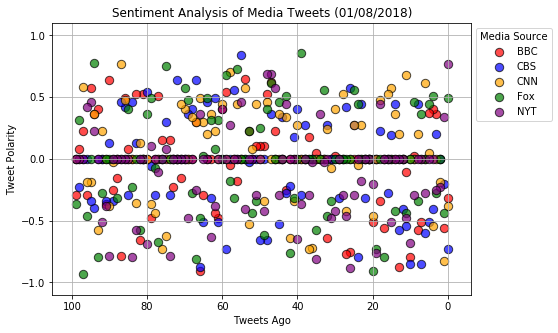

In [20]:
fig_1 = plt.figure()

# Set up the 1st plot, scatter plot
plt.figure(figsize=(7.5,5))

# Plot each source's data points
for account in tweets_dict:
    plt.scatter(range(0,len(tweets_dict[account])), tweets_dict[account], 
                label=convert[account]["org"], alpha=0.7, s=70,
                color=convert[account]["color"], edgecolors="black")
    plt.gca().invert_xaxis()

# Customize the y axis
plt.ylim(-1.1,1.1)
plt.yticks(np.arange(-1, 1.5, 0.5))

# Set the legend outside the plot
plt.legend(title="Media Source", bbox_to_anchor=(1,1))

# Title and axes labels
plt.title("Sentiment Analysis of Media Tweets (%s)" \
          % (datetime.today().strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.grid()

# Save and show
fig_1.savefig("Sentiment_Analysis_over_100_tweets.png")
plt.show()

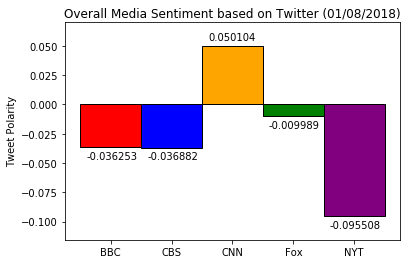

In [21]:
# Set up figure for saving
fig_2 = plt.figure()

# Keep track of x_positions and average polarity values
x_position_list = []
avg_pol_list = []

# Plot each source's average compound polarity
x_position = 0
for account in tweets_dict:
    plt.bar(x_position, np.mean(tweets_dict[account]), 
            edgecolor="black", color=convert[account]["color"], 
            width=1, label=np.mean(tweets_dict[account]))
    
    x_position_list.append(x_position)
    avg_pol_list.append(np.mean(tweets_dict[account]))
    x_position += 1

# Put source labels in xticks
source_labels = []
for account in tweets_dict:
    source_labels.append(convert[account]["org"])
plt.xticks(x_position_list, source_labels)

# Set up text label's y-position according to avg_pol value
def set_text_y_position(value):
    if value >= 0:
        y_position = value + 0.005
    else:
        y_position = value - 0.01
    
    return y_position

text_y_list = []
for each in avg_pol_list:
    text_y_list.append(set_text_y_position(each))
    
# Add the text label on each bar
for x in range(0, len(x_position_list)):
    plt.text(x_position_list[x]-0.4, text_y_list[x], str(avg_pol_list[x]))    

# Make sure that the ylims can accommodate the data
plt.ylim(min(avg_pol_list)-0.02, max(avg_pol_list)+0.02)

# Title and axes labels
plt.title("Overall Media Sentiment based on Twitter (%s)" \
          % (datetime.today().strftime("%m/%d/%Y")))
plt.ylabel("Tweet Polarity")


# Save and show
fig_2.savefig("Overall_Media_Sentiment.png")
plt.show()